In [1]:
import pandas

url = "https://raw.githubusercontent.com/vzhou842/profanity-check/master/profanity_check/data/clean_data.csv"

c = pandas.read_csv(url)

In [2]:
c.head()

,is_offensive,text
0,0,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂
3,0,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,..."


In [3]:
c.shape

(184354, 2)

In [4]:
c['is_offensive'].value_counts()

0    147509
1     36845
Name: is_offensive, dtype: int64

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [7]:
c['text']=c['text'].apply(str)
data=c['text']

In [8]:
corpus=[]
import re
a=set(stopwords.words('english'))
for ele in range(0,len(data)):
  review=re.sub('[^a-zA-Z]',' ',data[ele])
  review=review.lower()
  corpus.append(review)


In [9]:
import sys
sys.setrecursionlimit(5000)

In [10]:
corpus2=[]
for ele in corpus:
  l=list(ele.split())
  review=[ps.stem(word) for word in l if not word in a]
  corpus2.append(' '.join(review))
  


In [11]:
y=c['is_offensive']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
train=cv.fit_transform(corpus2)

In [13]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(train,y,test_size=0.25,random_state=0)

In [14]:
train.shape

(184354, 137594)

In [42]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()


In [43]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(nb,{'alpha' : [0.01,0.1,1,2,3,10]})

In [44]:
dir(gs)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_required_parameters',
 '_run_search',
 'classes_',
 'cv',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'n_jobs',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'return_train_score',
 'score',
 'scoring',
 'set_params',
 'transform',
 'verbose']

In [47]:
nb=gs.estimator

In [48]:
nb.fit(x1,y1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
x=nb.predict(x2)

In [21]:
c['text'][2]

'Dis hoe wasnt dis violent on Lottery Ticket 😂😂'

In [ ]:
i=0
for ele in x:
  if( ele == 1):
    print(c['text'][i])
    print('---------------------------------------------------------------------------------------------------')
  i=i+1;

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y2,x)

0.9303955390657207

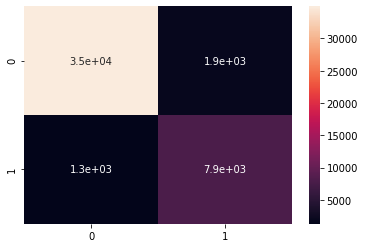

In [51]:
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y2,x)
sns.heatmap(cm,annot=True)



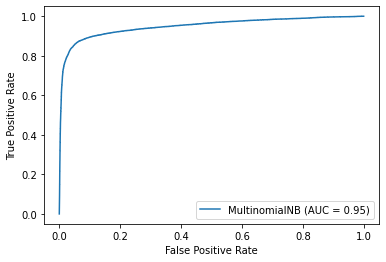

In [52]:
plot_roc_curve(nb,x2,y2)

In [ ]:
plot_roc_curve(,x2,y2)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [31]:
knn.fit(x1,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
x=knn.predict(x2)

In [33]:
accuracy_score(y2,x)

0.9188092603441168

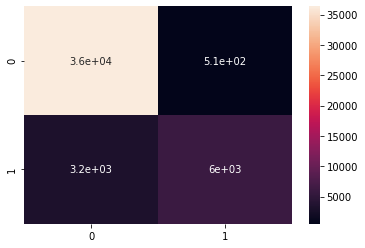

In [38]:
cm=confusion_matrix(y2,x)
sns.heatmap(cm,annot=True)

In [45]:
from sklearn.metrics import plot_roc_curve


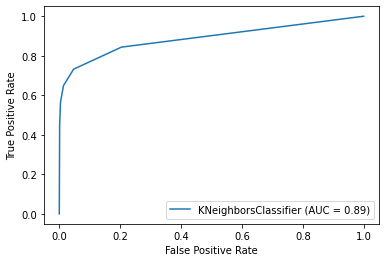

In [46]:
plot_roc_curve(knn,x2,y2)